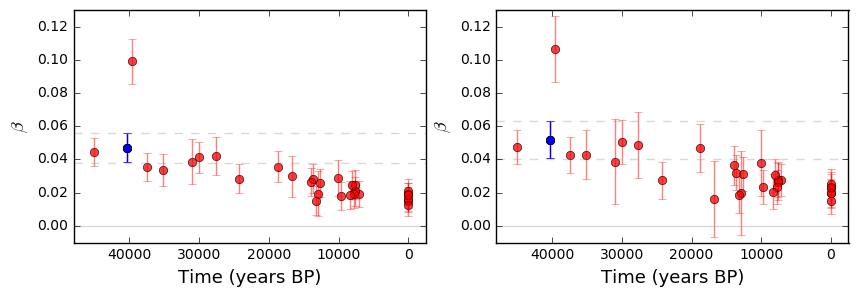

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import projmodules as pm

fhs = ['UPA_all2.rn1.071316.f4set','UPA_all2.rn1.071316.transv.f4set']
pD = '/home/mel_yang/projects/allTYstuff/SOMX5_Nea/'
subset = 'NEWtargetAnc_fArc_Dinka'
fig = plt.figure(figsize=(10,3))
labels='AB'
cutoff = [0.038159,0.040481]
maxcutoff = [0.055879,0.063221]
for ind,fh in enumerate(fhs):
    uncorr_f4 = pm.f4_extractinfo(pD, fh+'.f4.'+subset, [3])
    mypops = ['UstIshim','Oase1','TY','Kostenki14','GoyetQ116-1','Vestonice16','KremsWA3',
               'Ostuni1','ElMiron','Villabruna','Bichon','Rochedane','Ranchot88',
             'Loschbour','LaBrana1','Hungarian.KO1','Malta1','AfontovaGora3','Satsurblia',
             'Kotias','Motala12','Karelia','Stuttgart','Clovis','Mixe','Surui','Han','Ami',
             'Sardinian','French']
    datefile = open(pD+'ancientdata_dates_updated102816.txt','r') #ancientdata_dates.txt
    mydates = {}
    for line in datefile:
        x = line.split()
        if x[0] ==  'Ancient': continue
        mydates[x[0]] = float(x[3])
        
    for i in ['Han','Ami','Dai','Mixe','Karitiana','Surui','Sardinian','French','Papuan']: mydates[i] = 0
    
    myinds, myxs, alpha, mini, maxi, se = [],[],[],[],[],[]
    for mykey in uncorr_f4:
        if mykey[0] in mypops: #md.fu2016morethan01x+['French','Mixe','Han','TY']:
            myinds.append(mykey[0])
            myxs.append(mydates[mykey[0]])
            alpha.append(1-uncorr_f4[mykey][0])
            mini.append(1-uncorr_f4[mykey][0]-uncorr_f4[mykey][-1])
            maxi.append(1-uncorr_f4[mykey][0]+uncorr_f4[mykey][-1])
            se.append(uncorr_f4[mykey][-1])
    inds = [x for (w,x,y,z,a,b) in sorted(zip(myxs,myinds,alpha,mini,maxi,se))]
    ys1 = [y for (w,x,y,z,a,b) in sorted(zip(myxs,myinds,alpha,mini,maxi,se))]
    xs1 = [w for (w,x,y,z,a,b) in sorted(zip(myxs,myinds,alpha,mini,maxi,se))]
    min1 = [z for (w,x,y,z,a,b) in sorted(zip(myxs,myinds,alpha,mini,maxi,se))]
    max1 = [a for (w,x,y,z,a,b) in sorted(zip(myxs,myinds,alpha,mini,maxi,se))]
    se = [1.96*b for (w,x,y,z,a,b) in sorted(zip(myxs,myinds,alpha,mini,maxi,se))]
    #for ind1,i in enumerate(xs1): print inds[ind1],ys1[ind1], ys1[ind1]-se[ind1], ys1[ind1]+se[ind1] #inds[ind] #xs1[ind] #,  
    ax1=fig.add_subplot(1,2,ind+1)
    ax1.plot(xs1,ys1,'ro',alpha=0.5)
    ax1.plot(xs1[-2],ys1[-2],'bo')
    
    ax1.errorbar(xs1, ys1, yerr=se, fmt='ro',alpha=0.5)
    ax1.errorbar(xs1[-2], ys1[-2], yerr=se[-2], fmt='bo')
    ax1.set_ylim(-0.01,0.13)
    #ax1.set_xlim(-2500,48000)
    ax1.set_xlim(48000,-2500)
    ax1.set_xlabel('Time (years BP)',fontsize=13)
    ax1.set_ylabel(r'$ \beta $',fontsize=13)
    #ax1.text(50000,-0.03,labels[ind],fontsize=17)
    #plt.title("Archaic admixture into non-Africans")
    ax1.axhline(y=0, ls='solid', c='grey',alpha=0.3)
    ax1.axhline(y=cutoff[ind], ls='dashed', c='grey',alpha=0.3)
    ax1.axhline(y=maxcutoff[ind], ls='dashed', c='grey',alpha=0.3)
    print
    
    

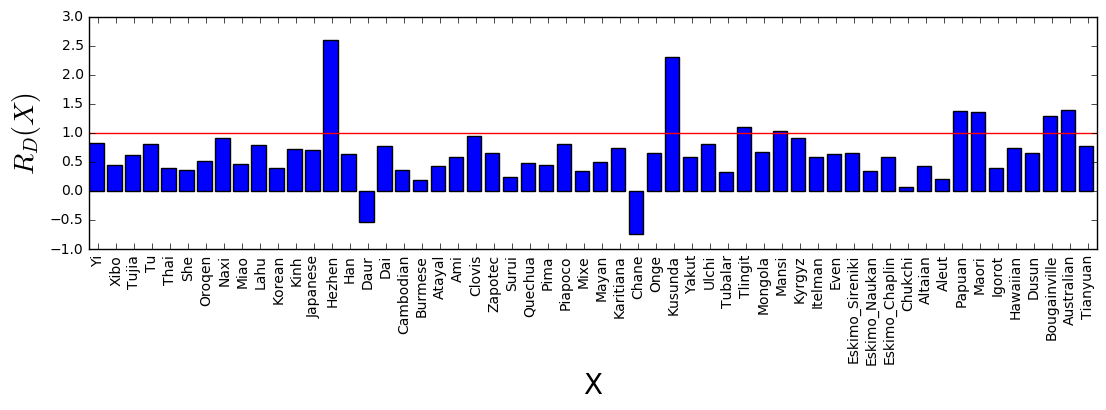

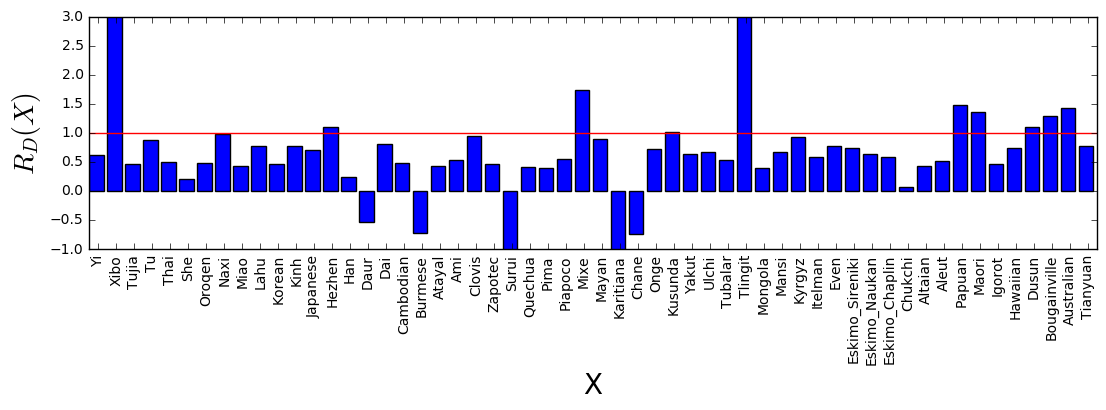

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import plotting_funcs as pf
import numpy as np

archaic = ['Denisovan','Altai']
myp2="French"
out="Mbuti"
mysets = [('/mnt/solexa/mel_yang/allTYstuff/TY_NeaAff/','EE'+'_'+myp2+'_'+'Arc'+'_'+out,'UPA_all2'),
    ('/home/mel_yang/projects/allTYstuff/SOMX5_Nea/','SGDPAsia'+'_'+myp2+'_'+'Arc'+'_'+out,'UPA_all2.singleSGDP')]

allids = ['TY','Australian', 'Bougainville', 'Dusun', 'Hawaiian', 'Igorot', 'Maori', 'Papuan',
          'Aleut', 'Altaian', 'Chukchi', 'Eskimo_Chaplin', 'Eskimo_Naukan', 'Eskimo_Sireniki', 
          'Even', 'Itelman', 'Kyrgyz', 'Mansi', 'Mongola', 'Tlingit', 'Tubalar', 'Ulchi', 'Yakut','Kusunda', 'Onge',
        'Chane', 'Karitiana', 'Mayan', 'Mixe', 'Piapoco', 'Pima', 'Quechua', 'Surui', 'Zapotec',
        'Clovis','Ami', 'Atayal', 'Burmese', 'Cambodian', 'Dai', 'Daur', 'Han', 'Hezhen', 'Japanese', 'Kinh',
        'Korean', 'Lahu', 'Miao', 'Naxi', 'Oroqen', 'She', 'Thai', 'Tu', 'Tujia', 'Xibo', 'Yi'] #'Kharia',#,'Tibeten_An4','Tibeten_An5','Tibeten_An6','Tibeten_An7','Tibeten_An8']

allids = allids[::-1]
labelids=allids[:-1]+["Tianyuan"]
mylabels=['A','B']
mycount=-1
for pD,subset,fh in mysets:
    mycount+=1
    myDfile = open(pD+fh+'.f4.'+subset+'.Dmat','r')
    mySEfile = open(pD+fh+'.f4.'+subset+'.SEmat','r')
    mydat, mypops = [],[]
    for line in myDfile: 
        x = line.split()
        if x[0] == 'Pops': continue
        if x[1]=='nan' or x[2] == 'nan': continue
        mynum = [float(i) for i in x[1:]]
        if mynum[0] == 'nan': continue
        mydat.append([mynum[0],mynum[1]])
        mypops.append(x[0])
        
    mydatSE, mypopsSE = [],[]
    for line in mySEfile: 
        x = line.split()
        if x[0] == 'Pops': continue
        if x[1]=='nan' or x[2] == 'nan': continue
        mynum = [float(i) for i in x[1:]]
        if mynum[0] == 'nan': continue
        mydatSE.append([mynum[0],mynum[1]])
        mypopsSE.append(x[0])
    myDfile.close(),mySEfile.close()
        
    myrat = []
    for ind,myD in enumerate(mydat):
        mydatavgSE=sum(mydatSE[ind])/2.0
        Den, DenMin, DenMax = (myD[0], myD[0]-2*mydatavgSE, myD[0]+2*mydatavgSE)
        Nea, NeaMin, NeaMax = (myD[1], myD[1]-2*mydatavgSE, myD[1]+2*mydatavgSE)
        #print Den, DenMin, DenMax, Nea, NeaMin, NeaMax
        myrat.append([Den/Nea, DenMin/NeaMin, DenMax/NeaMax, Den, Nea,mydatavgSE])
    #for ind,i in enumerate(myrat): 
    #    if i[0]>1: print mypops[ind], i
    
    myDs = [myrat[mypops.index(i)][0] for i in allids]
    mySEs2 = [1.96*myrat[mypops.index(i)][-1] for i in allids]
    #for ind,i in enumerate(myDs): 
    #    if i>1: print allids[ind], i
    fig = plt.figure(figsize=(13,3))
    ax = fig.add_subplot(111)
    rects1 = plt.bar(np.arange(len(allids)),myDs)
    #ax.errorbar(np.arange(len(allids)),myDs,yerr=mySEs2, color='darkgray',fmt='o',capthick=0,linewidth=7)
    ax.set_xlim((0,len(allids)))
    ax.set_ylim((-1,3))
    ax.set_xticklabels(labelids, minor=False,rotation=90,fontsize=10)
    ax.set_xticks(np.arange(len(allids))+0.5, minor=False)
    ax.set_xlabel('X',fontsize=20)
    ax.set_ylabel('$R_D(X)$',fontsize=20)
    ax.axhline(y=1,color='red')
    #ax.text(-4,-3,mylabels[mycount],fontsize=20)
    #xtickNames = ax.set_xticklabels(allids)
    #plt.setp(xtickNames, rotation=45, fontsize=10)
    plt.show()


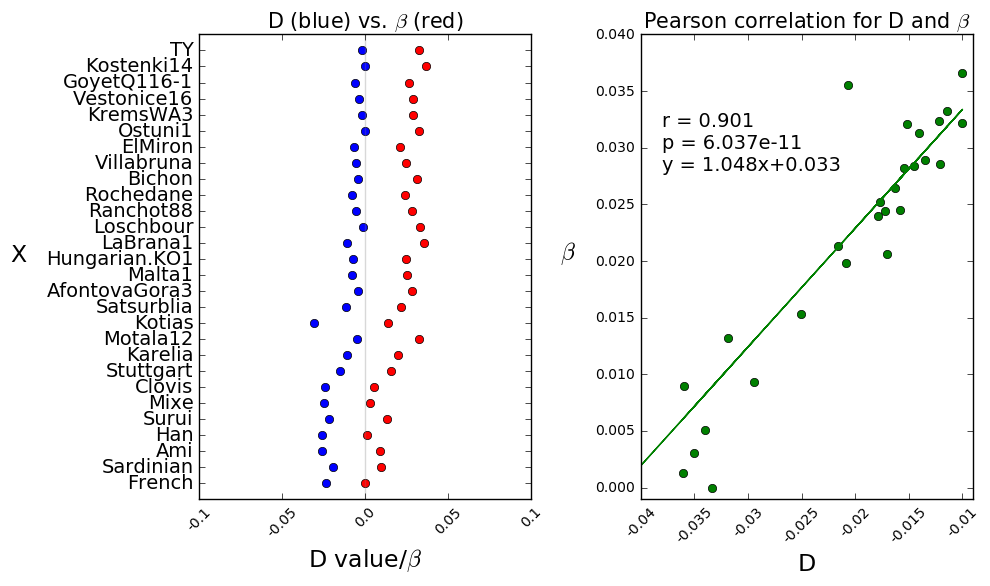

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import projmodules as pm
import numpy as np

fh = 'UPA_all2.rn1.071316.transv.f4set'
pD = '/home/mel_yang/projects/allTYstuff/SOMX5_Nea/'
subset = 'NEWtargetAnc_fArc_Dinka'
wantedpop = 'UstIshim'
uncorr_f4 = pm.f4_extractinfo(pD, fh+'.f4.'+subset, [3])
mypops = ['UstIshim','TY','Kostenki14','GoyetQ116-1','Vestonice16','KremsWA3',
           'Ostuni1','ElMiron','Villabruna','Bichon','Rochedane','Ranchot88',
         'Loschbour','LaBrana1','Hungarian.KO1','Malta1','AfontovaGora3','Satsurblia',
         'Kotias','Motala12','Karelia','Stuttgart','Clovis','Mixe','Surui','Han','Ami',
         'Sardinian','French']
datefile = open(pD+'ancientdata_dates.txt','r')
mydates = {}
for line in datefile:
    x = line.split()
    if x[0] ==  'Ancient': continue
    mydates[x[0]] = float(x[3])
    
for i in ['Han','Ami','Dai','Mixe','Karitiana','Surui','Sardinian','French','Papuan']: mydates[i] = 0

myalphas = {}
myinds,myxs=[],[]
for mykey in uncorr_f4:
    if mykey[0] in mypops: #md.fu2016morethan01x+['French','Mixe','Han','TY']:
        myinds.append(mykey[0])
        myxs.append(mydates[mykey[0]])
        myalphas[mykey[0]] = 1-uncorr_f4[mykey][0]
ys1 = [myalphas[i] for i in mypops] 


fh='UPA_all2.rn1.071316.transv'
allmypops= ['UstIshim','Oase1','TY','Kostenki14','GoyetQ116-1','Vestonice16','KremsWA3',
           'Ostuni1','ElMiron','HohleFels49','Villabruna','Bichon','Rochedane','Ranchot88',
         'Loschbour','LaBrana1','Hungarian.KO1','Malta1','AfontovaGora3','Satsurblia',
         'Kotias','Motala12','Karelia','Stuttgart','Clovis','Mixe','Surui','Han','Ami',
         'Sardinian','French','Papuan']
wantedindices = [ind for ind,i in enumerate(allmypops) if i in mypops]
wantedind = allmypops.index(wantedpop)

myp3s = ['Mbuti'] #,'Yoruba','Mbuti','Mota']
fs = 20
actualarys = []
for myp3 in myp3s:
    subset,myname=("CS_CS_%s_Chimp.tp" % myp3,"P1/P2")
    myfile = open(pD+fh+'.D.'+subset+'.Dmat','r')
    #print pD+fh+'.D.'+subset+'.Dmat'
    badindex='NA'
    for ind,line in enumerate(myfile):
        x = line.strip().split()
        if ind==0:
            header1 = [i for i in x[1:]]
            if 'Pops' in header1: 
                badindex=header1.index('Pops')
                header1.remove('Pops')
            mydata,header2=[],[]
            continue
        header2.append(x[0])
        if badindex!='NA': del x[badindex+1]
        mydata.append([float(i) if i != 'nan' else 0 for i in x[1:]])
    myary=np.array(mydata)
    if 'tp' in subset: myary = np.transpose(myary)
    actualarys.append(myary[:,wantedind][wantedindices])

mypops = np.array(mypops[1:])

fvals = np.array(ys1[1:])
fvals = np.max(fvals)-fvals
fig = plt.figure(figsize=(10,6))
ax1=fig.add_subplot(1,2,1)
ax1.plot(fvals,range(len(fvals)), 'ro')
for ind,i in enumerate(actualarys):
    dvals = i[1:]
    dvals = np.max(dvals)-dvals
    ax1.plot(dvals*-1,range(len(dvals)), 'bo')
    
ax1.set_yticks(range(len(dvals)))
ax1.set_yticklabels(mypops[::-1],fontsize=14)
ax1.set_ylim(-1,len(dvals))
ax1.set_xlim(-0.1,0.1)
xlabel = ax1.get_xticks().tolist()
ax1.set_xticklabels(xlabel,rotation=45)
ax1.axvline(x=0, ls='solid', c='gray',alpha=0.3)
ax1.set_xlabel(r'D value/$\beta$', fontsize=17)
ax1.set_ylabel('X',rotation=0, fontsize=17,labelpad=20)
ax1.set_title(r'D (blue) vs. $\beta$ (red)',fontsize=15)
#ax1.text(-0.15,-3.5,'A',fontsize=17)

ax1=fig.add_subplot(1,2,2)
ax1.set_title(r"Pearson correlation for D and $\beta$",fontsize=15)
ax1.set_xlabel('D',fontsize=17)
ax1.set_ylabel(r'$\beta$',rotation=0,fontsize=17,labelpad=20)
mydiff=(dvals*-1)-fvals
mset = np.vstack((dvals*-1, fvals))
ax1.plot(dvals*-1,fvals, 'go')
xlabel = ax1.get_xticks().tolist()
ax1.set_xticklabels(xlabel,rotation=45)
ax1.set_ylim(-0.001,0.04)
ax1.set_xlim(-0.03,0.001)
from scipy.stats import linregress
(m,b,r,p,e) = linregress(dvals*-1,fvals)
myfit = np.polyval([m,b],dvals*-1)
ax1.plot(dvals*-1,myfit, 'g-')
ax1.text(-0.028,0.028,"r = %.3f\np = %.3e\ny = %.3fx+%.3f" % (r,p,m,b),fontsize=14)
#ax1.text(-0.037,-0.0045,'B',fontsize=17)
plt.tight_layout()
